# Parabolic Orbit
## Given:
Spacecraft departing from Earth

## Find:
a) Circular orbit parked at 180 km. Perigee at 180 km compare the escape velocity.

b) Compute velocity, $\gamma$, $\theta^*$, along the parabolic orbit. $r = 2R_{Earth}$,  $r = 8R_{Earth}$,  $r = 15R_{Earth}$,  $r = 60R_{Earth}$, and  $r = R_{\infty}$

c) Plot $-110^o < \theta^* < 110$. Compare $\theta^*$ and $\gamma$.

In [1]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
miu = SS.loc['Earth', 'miu']
r_c = SS.loc['Earth', 'r'] + 180
array = np.array([ 2, 8, 15, 30, 60, 10000])
r_array = SS.loc['Earth', 'r']*array
e = 1

### Part a) and b)

In [3]:
v_c_array = np.sqrt(miu/ r_array)
v_p_array = np.sqrt(2) * v_c_array

rp = r_c
p = 2*rp
h = np.sqrt(miu*2*rp)

thst_array = np.arccos(2*rp/r_array - 1)
thst_array = kp.angle.radians(thst_array)

gamma_array = kp.gamma.gamma_h_r_v_thst(h, r_array, v_p_array, thst_array.rad)


table = pd.DataFrame({'Distance (Earth Rad)': array,
                      'Circular Vel (km/s)': v_c_array, 
                      'Parabolic Vel (km/s)': v_p_array,
                      'True anomaly (deg)': thst_array.deg,
                      'Flight Path angle (deg)': gamma_array.deg})

table

,Distance (Earth Rad),Circular Vel (km/s),Parabolic Vel (km/s),True anomaly (deg),Flight Path angle (deg)
0,2,5.589938,7.905366,88.382818,44.191409
1,8,2.794969,3.952683,137.982862,68.991431
2,15,2.041157,2.886632,149.644203,74.822102
3,30,1.443316,2.041157,158.662284,79.331142
4,60,1.020578,1.443316,164.955817,82.477908
5,10000,0.079054,0.111799,178.838007,89.419004


### Part c)

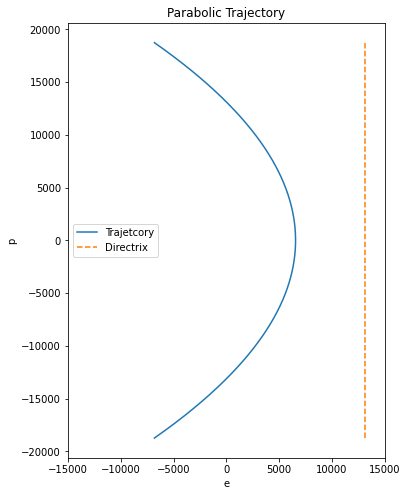

In [24]:
thst = kp.thst.degree(np.linspace(-110, 110, 500))
r = kp.distance.keplar_r(p, e, thst.rad)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(r.per[:,0], r.per[:,1], label='Trajetcory')
ax.plot([p,p], r.per[[0,-1],1], ls = '--', label='Directrix')
ax.set_aspect('equal', 'box')
ax.set_xlim([-15000, 15000])
ax.set_xlabel('e')
ax.set_ylabel('p')
ax.set_title('Parabolic Trajectory')
ax.legend()
